## Observations and Insights 

In [1]:
#matplotlib inline

In [275]:
## Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy.stats as linregress


## Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

## Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [66]:
## Preview of .csv
print(study_results.head())
print()
print(mouse_metadata.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16


In [67]:
## Combine the data into a single dataset
MergedMiceData_DF = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")

## Display the data table for preview
MergedMiceData_DF.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [68]:
## Get info summary on database thus far
print(MergedMiceData_DF.describe())
MergedMiceData_DF.dtypes

        Age_months   Weight (g)    Timepoint  Tumor Volume (mm3)  \
count  1893.000000  1893.000000  1893.000000         1893.000000   
mean     12.814580    25.662441    19.572108           50.448381   
std       7.189592     3.921622    14.079460            8.894722   
min       1.000000    15.000000     0.000000           22.050126   
25%       7.000000    25.000000     5.000000           45.000000   
50%      13.000000    27.000000    20.000000           48.951474   
75%      20.000000    29.000000    30.000000           56.292200   
max      24.000000    30.000000    45.000000           78.567014   

       Metastatic Sites  
count       1893.000000  
mean           1.021659  
std            1.137974  
min            0.000000  
25%            0.000000  
50%            1.000000  
75%            2.000000  
max            4.000000  


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [74]:
## Check info on Mouse ID's (ie counts, values, unique ID's)
#MergedMiceData_DF['Mouse ID'].unique()
UniqMouseIDs = MergedMiceData_DF['Mouse ID'].nunique()
print(f'The number of unique Mouse IDs is: {UniqMouseIDs}.''\n')
## Checking the number of mice.
print(MergedMiceData_DF.count())
MergedMiceData_DF['Mouse ID'].value_counts()

The number of unique Mouse IDs is: 249.

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64


g989    13
k862    10
u327    10
l733    10
i334    10
        ..
h428     1
l872     1
b447     1
x336     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [75]:
CleanMiceData_DF = MergedMiceData_DF
CleanMiceData_DF.head(5)
CleanMiceData_DF.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [97]:
## Optional: Get all the data for the duplicate mouse ID. 
## Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupMice = MergedMiceData_DF[MergedMiceData_DF.duplicated(["Mouse ID", "Timepoint"], keep=False)]

dupNumber = dupMice[['Mouse ID', 'Timepoint']].count()
print(f'The number of duplicates for data is: \n{dupNumber} ')
print()

## Showing the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
print("Here are the row numbers, Mouse IDs, and Timpepoints values that are repeated:")
print(dupMice[['Mouse ID', 'Timepoint']])
print()


The number of duplicates for data is: 
Mouse ID     10
Timepoint    10
dtype: int64 

Here are the row numbers, Mouse IDs, and Timpepoints values that are repeated:
    Mouse ID  Timepoint
908     g989          0
909     g989          0
910     g989          5
911     g989          5
912     g989         10
913     g989         10
914     g989         15
915     g989         15
916     g989         20
917     g989         20



In [102]:
## Create a clean DataFrame by dropping the duplicate mouse by its ID.

## Creating cleaned merged dataset by dropping duplicates above from DF.
## df.drop_duplicates([column(s)], keep, inplace) - Returns DF w/dup rows from columns removed 

CleanMiceData_DF = CleanMiceData_DF.drop_duplicates(["Mouse ID", "Timepoint"], keep=False, inplace=False)

## OR could also have used:
#CleanMiceData_DF = MergedMiceData_DF.drop_duplicates(subset=["Mouse ID","Timepoint"])



# Checking the number of mice in the clean DataFrame.
print(CleanMiceData_DF.count())
UniqMouseIDs = CleanMiceData_DF['Mouse ID'].nunique()
print(f'The number of unique Mouse IDs is: {UniqMouseIDs}.''\n')

Mouse ID              1883
Drug Regimen          1883
Sex                   1883
Age_months            1883
Weight (g)            1883
Timepoint             1883
Tumor Volume (mm3)    1883
Metastatic Sites      1883
dtype: int64
The number of unique Mouse IDs is: 249.



## Summary Statistics

In [104]:
# Preview of dataframe for code reference
CleanMiceData_DF.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [116]:

## Use groupby and summary statistical methods to calculate the following properties of each drug regimen: # mean, median, variance, standard deviation, and SEM of the tumor volume. 

## TestDF = CleanMiceData_DF.groupby("Drug Regimen")
## TestDF
## TestDF['Tumor Volume (mm3)'].mean()
## TestDF2 = CleanMiceData_DF.groupby("Drug Regimen")['Tumor Volume (mm3)']
## TestDF2
## TestDF2.mean()
## TestDF3 = CleanMiceData_DF.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
## TestDF3
## TestDF3 = "...." .mean(), .median(), .var(), .std(), .sem()"

DrugMean = CleanMiceData_DF.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
DrugMedian = CleanMiceData_DF.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
DrugVari = CleanMiceData_DF.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
DrugStdDev = CleanMiceData_DF.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
DrugSEM = CleanMiceData_DF.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

#print(DrugMean)
#print(DrugMedian)
#print(DrugVari)
#print(DrugStdDev)
#print(DrugSEM)

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.540135
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64


In [152]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen. Assemble the resulting series into a single summary dataframe.

SummaryDrugReg_DF = pd.DataFrame({
    "Mean": DrugMean, "Median": DrugMedian, "Variance": DrugVari, 
    "Std Deviation": DrugStdDev, "SEM": DrugSEM})
#SummaryDrugReg_DF

SummaryDrugReg_DF.style.set_caption('TUMOR VOLUME VALUES')
#SummaryDrugReg_DF.style.set_table_attributes('class="pure-table"').set_caption('TUMOR VOLUMES')
#SummaryDrugReg_DF.style.set_table_attributes("style='display:inline'").set_caption('TUMOR VOLUMES')

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [164]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen. Using the aggregation method, produce the same summary statistics in a single line
#  = df.groupby(['Drug GrpBy Col']).agg({('Tumor Vol Col'):["mean", "median", "var", "std", "sem"]})

AggSummary = CleanMiceData_DF.groupby(["Drug Regimen"]).agg({
    "Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

AggSummary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

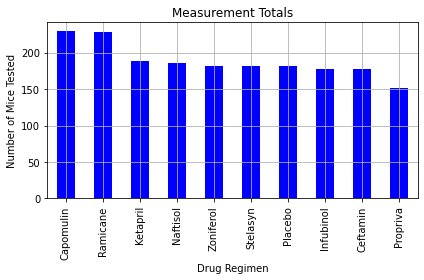

In [355]:
## Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
## Groupby on Drug Regimen
DrugRegimen = CleanMiceData_DF.groupby(["Drug Regimen"])
#DrugRegimen = CleanMiceData_DF.groupby("Drug Regimen")['Mouse ID'].count()
#DrugRegimen.head(10)

## Number of mice used for each drug ( for Y axis)
UniqMouseIDs = DrugRegimen['Mouse ID'].count()

## Ordering greatest to lowest
UniqMouseIDs.sort_values(ascending=False, inplace=True)

## Panda bar plot with index/Regimen as x-axis, and 'Mouse ID' count as y-axis)
UniqMouseIDs.plot(kind='bar', y ='Mouse ID', color='b', align="center")

## Label for y-axis, setting a tight layout, and saving fig to 'data' folder
plt.grid()
plt.ylabel("Number of Mice Tested")
plt.title("Measurement Totals")
plt.tight_layout()
plt.savefig("data/Bar_Panda_MiceTestedRegimen.jpg", dpi=200)
plt.show()


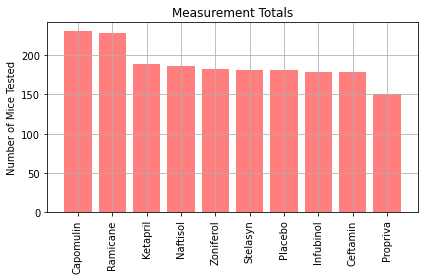

In [356]:
## Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot. 
## Using some of the same variables (DrugRegimen & UniqMouseIDs) 
## X-axis based on length of Regimens
X_AxisDrugs = np.arange(len(DrugRegimen))

plt.bar(X_AxisDrugs, UniqMouseIDs, color='r', alpha=.5, align="center")
plt.xticks(X_AxisDrugs, labels=UniqMouseIDs.index, rotation="90") #labels=DrugRegimen

plt.grid()
plt.title("Measurement Totals")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.savefig("data/Bar_Plyplot_MiceTestedRegimen.jpg", dpi=200)

plt.show()


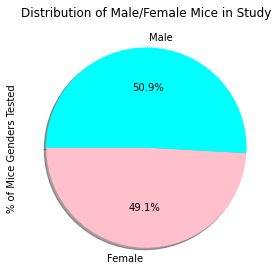

In [357]:
## Generate a pie plot showing the distribution of female versus male mice using pandas

## Generate data on mice results based on sex of mice
MiceGender = CleanMiceData_DF.groupby(["Sex"])
GenderResults = MiceGender['Drug Regimen'].count()
GenderResults

GenderResults.plot(kind='pie', labels=GenderResults.index, colors=("pink", "cyan"),
        autopct="%1.1f%%", shadow=True, startangle=-180)

## Label for y-axis, setting a tight layout, and saving fig to 'data' folder

plt.ylabel("% of Mice Genders Tested")
plt.title("Distribution of Male/Female Mice in Study")
plt.tight_layout()
plt.savefig("data/Pie_Panda_MiceGenders.jpg", dpi=200)
plt.show()


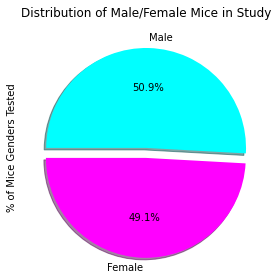

In [358]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot
MiceGender = CleanMiceData_DF.groupby(["Sex"])
GenderResults = MiceGender['Drug Regimen'].count()

plt.pie(GenderResults, explode = (0.1,0.0), labels=GenderResults.index, colors=("magenta", "aqua"),
        autopct="%1.1f%%", shadow=True, startangle=-180)

plt.ylabel("% of Mice Genders Tested")
plt.title("Distribution of Male/Female Mice in Study")
plt.tight_layout()
plt.savefig("data/Pie_Plyplot_MiceGenders.jpg", dpi=200)

plt.show()


## Quartiles, Outliers and Boxplots

In [359]:
## Calculate the final tumor volume of each mouse across four of the treatment regimens:  
## Capomulin, Ramicane, Infubinol, and Ceftamin

## Start by getting the last (greatest) timepoint for each mouse 
MiceTumorStudy_DF = CleanMiceData_DF
MiceTumorStudy_DF

MiceTumorStudy_DF = MiceTumorStudy_DF.groupby('Mouse ID').max().reset_index()
MiceTumorStudy_DF

## Merge this group df with the original dataframe to get the tumor volume at the last timepoint
MiceTumorStudy_DF = MiceTumorStudy_DF[['Mouse ID','Timepoint']].merge(CleanMiceData_DF, on=['Mouse ID','Timepoint'])
MiceTumorStudy_DF


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
## Put treatments into a list for for loop (and later for plot labels)
Treatments ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

## Create empty list to fill with tumor vol data (for plotting)
TumorVolume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
